# networking following gojek on instagram

To get the product being promoted

In [4]:
import collections
import pandas as pd
from os import listdir
import json, os, argparse, shutil, sys
from dateutil.parser import parse
from pytz import timezone
from bson import json_util
import warnings
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import six
import seaborn as sns
import networkx as nx
from community.community_louvain import (
    partition_at_level,
    modularity,
    best_partition,
    generate_dendrogram,
    induced_graph,
    load_binary,
)

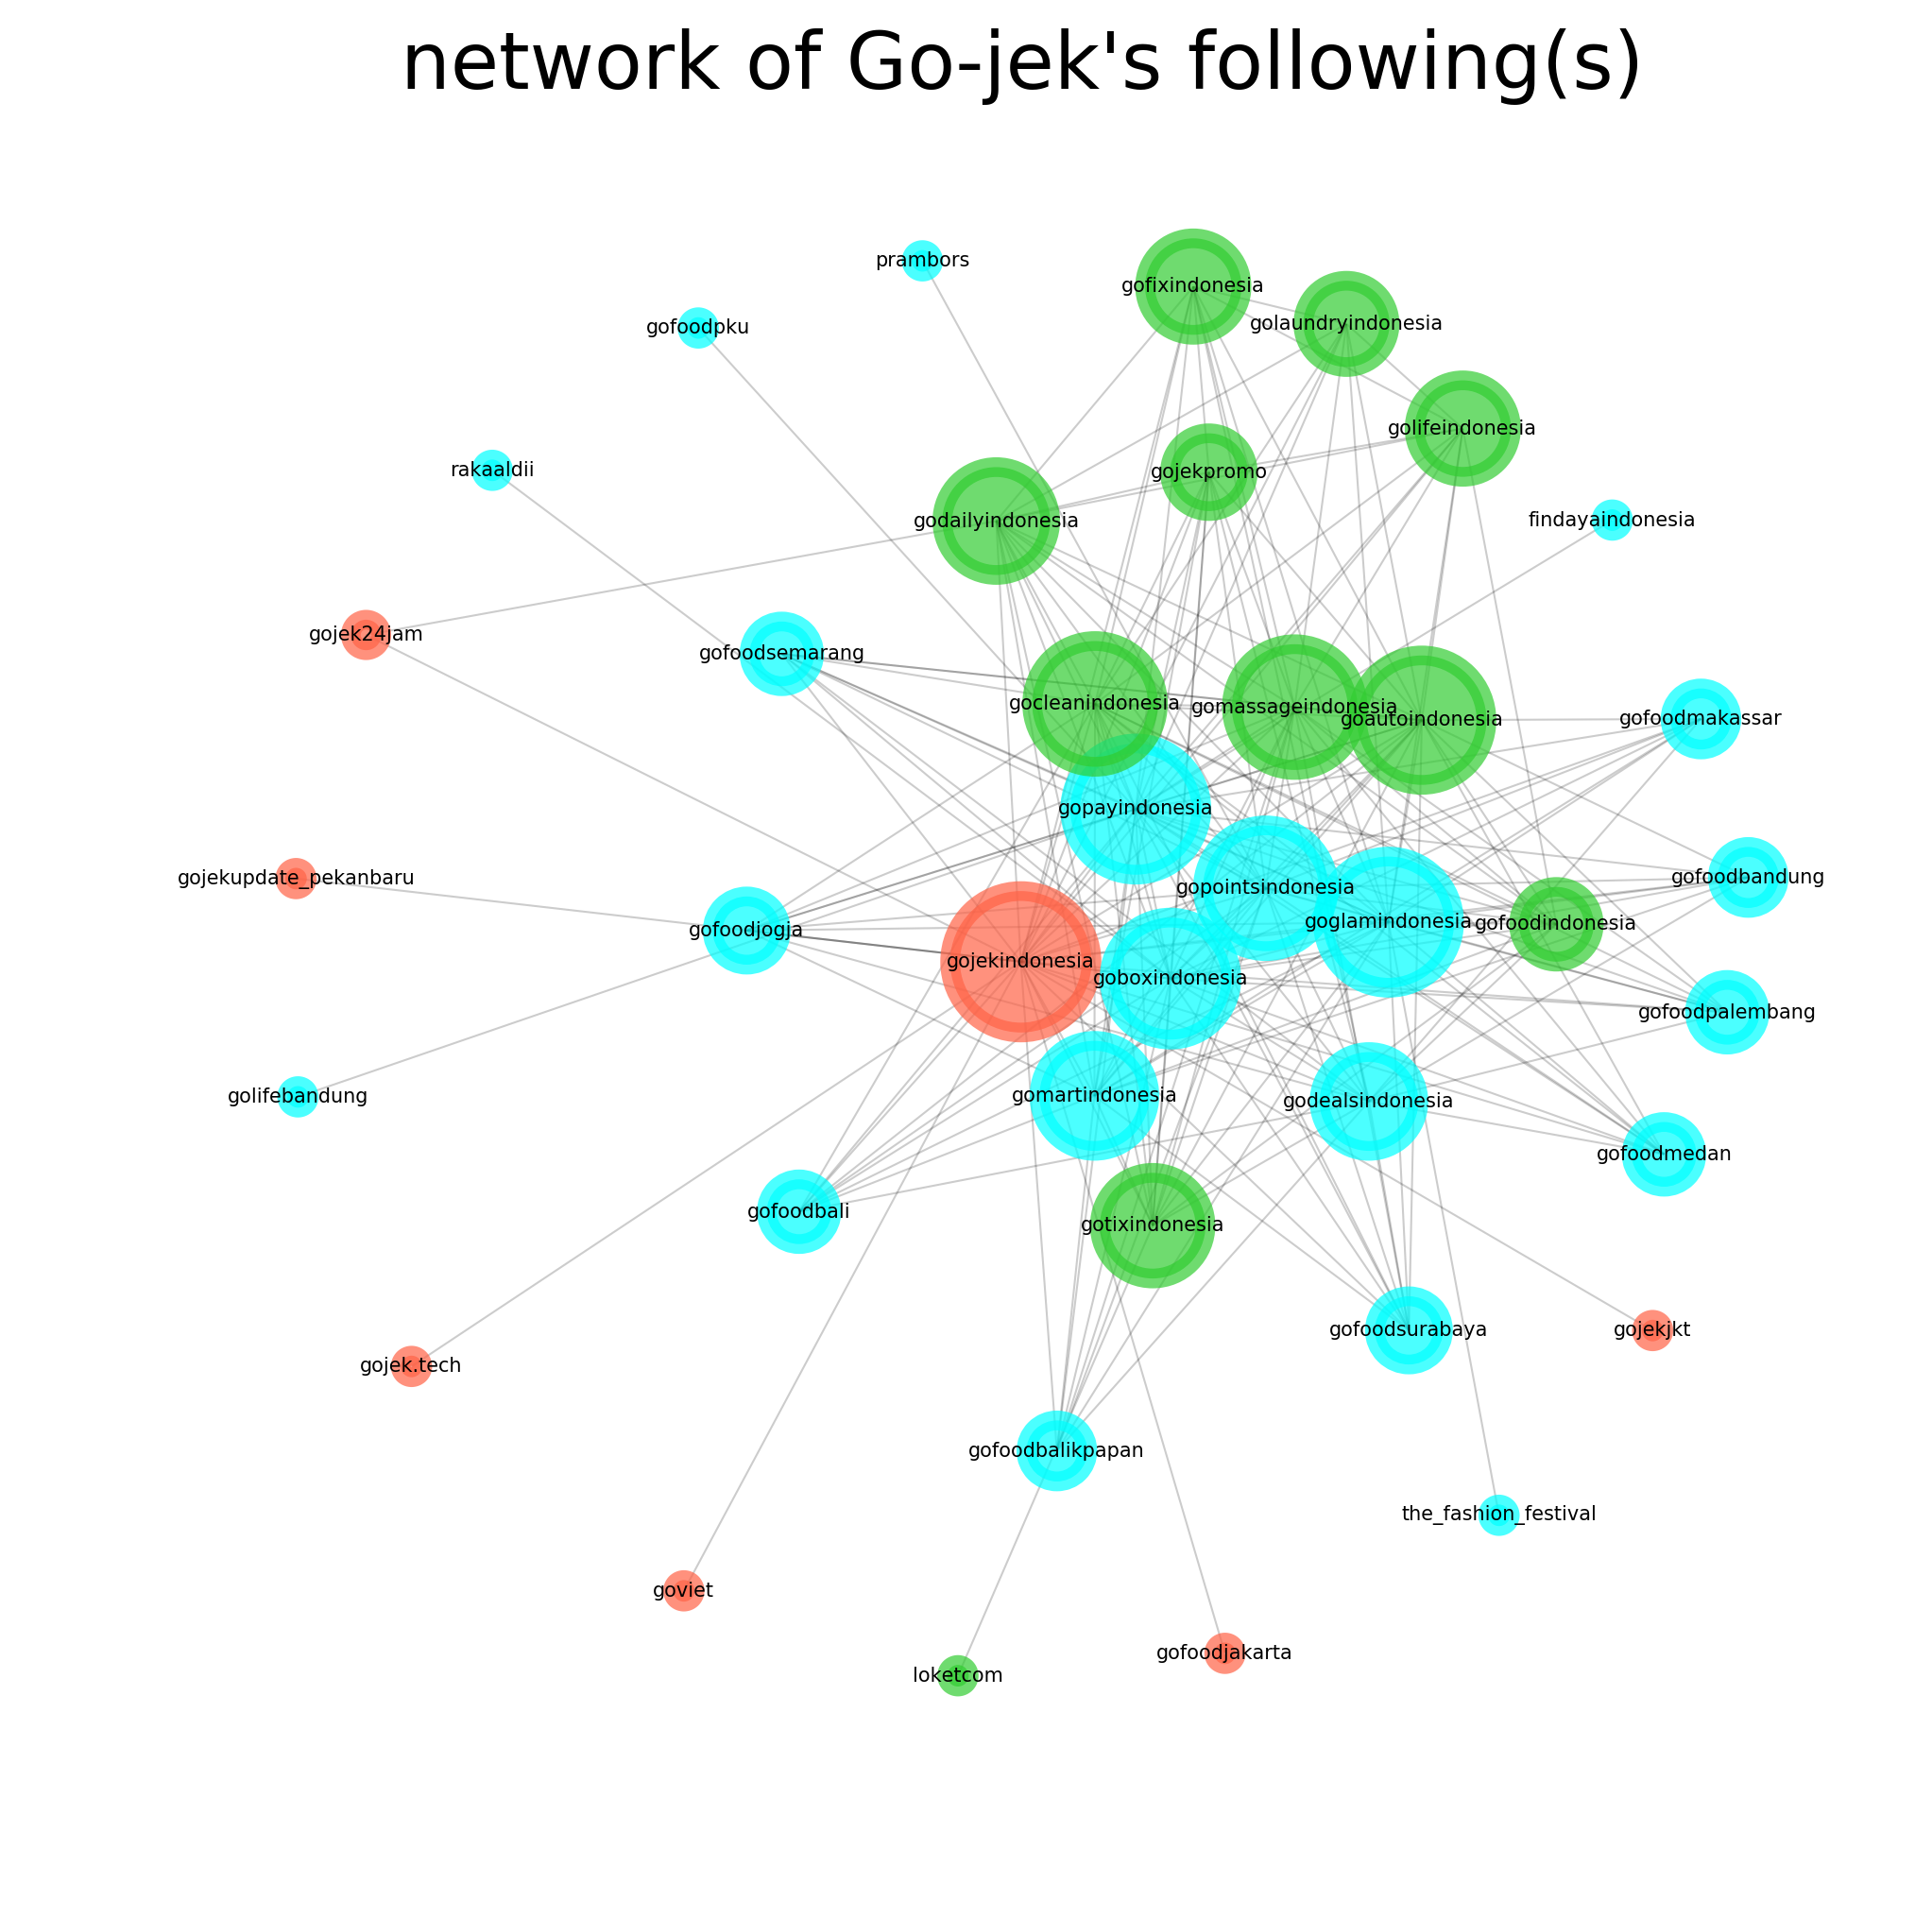

In [127]:
edges=pd.read_csv('edges_following.csv')
nodes=pd.read_csv('nodes_following.csv')
clrs_ = ['tomato','cyan','limegreen','orange','orchid','palegreen','hotpink','yellow']
plt.figure(figsize=(8, 8), dpi=300)
g = nx.from_pandas_dataframe(edges, source='source', target='target') 
h=pd.DataFrame(g.nodes())
hasil=h.merge(nodes[['size','label']], left_on=0, right_on='label')

# layout = nx.spring_layout(g,k=0.25, scale=5.5) #semakin besar, semakin nyebar
layout = nx.fruchterman_reingold_layout(g,k=0.3, scale=15.5) 
# clubs = [node for node in g.nodes()]
clubs=hasil.label.tolist()
size=hasil['size'].tolist()
# size = list(nodes['size'])
club_dict = dict(zip(clubs, clubs))
part = best_partition(g, resolution=1)

values1 = [part.get(node) for node in g.nodes()]
cmap_fchrulk = clrs.ListedColormap(clrs_[:len(set(part.values()))])


nx.draw_networkx_edges(g, layout, alpha=0.2, width=0.5, arrows=False)
nx.draw_networkx_nodes(g, layout, nodelist=clubs, node_size=size, 
                       node_color=values1, alpha=0.7, linewidths=5, cmap = cmap_fchrulk)
nx.draw_networkx_labels(g, layout, labels=club_dict, font_size=5)

dc=nx.degree_centrality(g)
bc=nx.betweenness_centrality(g)
cc=nx.closeness_centrality(g)
ec=nx.nx.eigenvector_centrality(g)
collect={'username':[],'cluster':[],'betweenness':[],'closeness':[],'eigenvector':[],'degree centrality':[], 'degree':[]}
o=0
# for i in list(g.nodes()):
#     collect['username'].append(i)
#     collect['degree centrality'].append(dc[i])
#     collect['betweenness'].append(bc[i])
#     collect['closeness'].append(cc[i])
#     collect['eigenvector'].append(ec[i])
#     collect['degree'].append(g.degree[list(g.nodes())[o]])
#     collect['cluster'].append(values1[o])
#     o+=1
# collect=pd.DataFrame(collect, columns=['username','cluster','degree','betweenness','closeness','eigenvector','degree centrality'])
g.name="network of Go-jek's following(s)"

plt.axis('off')
plt.title("network of Go-jek's following(s)", fontsize=20)
plt.savefig("network of gojek's following(s).png",bbox_inches='tight', transparent=True)
plt.show()

In [113]:
dc=nx.degree_centrality(g)
bc=nx.betweenness_centrality(g)
cc=nx.closeness_centrality(g)
ec=nx.nx.eigenvector_centrality(g)
collect={'username':[],'cluster':[],'betweenness':[],'closeness':[],'eigenvector':[],'degree centrality':[], 'degree':[]}
o=0

In [148]:
df=pd.DataFrame(g.nodes(),columns=['label'])
for i,j in zip([dc,bc,cc,ec],['degree_centrality','betweenness','closeness','eigenvector']):
    temp=pd.DataFrame([i]).T.reset_index().rename(columns={0:j,'index':'label'})
    df=df.merge(temp, on='label')

In [165]:
df.sort_values(list(set(df.columns)-set(['label'])), ascending=False).reset_index(drop=True)

,label,degree_centrality,betweenness,closeness,eigenvector
0,gojekindonesia,0.789474,0.304706,0.826087,0.277490
1,gopayindonesia,0.736842,0.183809,0.791667,0.283600
2,goglamindonesia,0.631579,0.079117,0.730769,0.260832
3,goautoindonesia,0.605263,0.024724,0.716981,0.263191
4,goboxindonesia,0.605263,0.070661,0.716981,0.257328
5,gopointsindonesia,0.605263,0.070661,0.716981,0.257328
6,gocleanindonesia,0.552632,0.017525,0.690909,0.249141
7,gomassageindonesia,0.552632,0.018175,0.690909,0.248215
8,gomartindonesia,0.473684,0.010406,0.655172,0.222000
9,godailyindonesia,0.421053,0.020939,0.633333,0.201413
